## Perform Quantatative Discursive Analysis on ##

##First load all the relevant libraries
---
- [Quantitative-Discursive-Analysis](https://github.com/metalcorebear/Quantitative-Discursive-Analysis) (v0.0.1): This is a library by [@metalcorebear](https://github.com/metalcorebear) that simplifies the creation of discursive objects and performing resonance analysis of those objects to each other.  I am importing a forked version of his code which includes minor changes.  Additionally, this code also requires several other packages in order to run succesfully.
  -  [numpy]() (v ):
  -  [networkx]() (v2.3):
  -  [textblob]() (v):
- [pandas](https://pandas.pydata.org/): used to read in CSV data, do basic data cleaning, and store all our data.  This is a heavy hitter of Python for Data Science.
- [plot.ly](https://plot.ly/python/getting-started/): express is used for simple graphs and graph_objects is used for more complicated graphs.  
 - NOTE: prior to [version 4.0](https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee) of plot.ly it defaulted to an online mode that was widely despised, but v4.0 fixes this issue.  

The below code also returns the versions of some of the modules, to help with documentation/academic paper writing.

In [1]:
# Import the fork of @metalcorebear's Quantitative-Discursive-Analysis repository 
!git clone https://github.com/PurpleDin0/Quantitative-Discursive-Analysis.git

%cd /content/Quantitative-Discursive-Analysis/ # navigate to the created folder

# install required modules
!pip install -r requirements.txt   #WARNING: Code is not compatible with networkx v2.4, this installs the compatable version

#
import QDA as QDA         
 
import pandas as pd  #import pandas
print("Pandas imported as Version: ",pd.__version__)
# import plotly                ## Commented out as only plotly.graph_objects was needed in this analysis
# print("Plotly imported as Version: ",plotly.__version__) 
# import plotly.graph_objects as go #I am only loading the sub-modules that are needed in my code to make it faster to load

import pickle                     #So we can save any of our output variables for later use
import json                       #So we can import our saved JSON data
#from sys import getsizeof        # allows us to check the size of variables, good way to check that you don't blowup your VM by using to much memory.
#import string                ## Commented out as no longer needed
#import nltk
!python -m textblob.download_corpora
#from nltk.corpus import stopwords
#import networkx as nx
import numpy as np

Cloning into 'Quantitative-Discursive-Analysis'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
/content/Quantitative-Discursive-Analysis
Pandas imported as Version:  1.0.4
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...

## Mounting Google Drive

The best way to get input text into the *Colaboratory* VM, and to get any output info out of *Colaboratory*, is to route it through Google Drive *first*.

Running this cell (which will only work in *Colaboratory*) will mount your personal Google Drive in the VM, which later cells can use to get data in/out. (it will ask for an auth code; that auth is not saved anywhere).  
<font color='red'>**WARNING:**</font> Running this cell and authorizing access to *YOUR* google drive will give this notebook full read/write access to all your google drive files.  Only do this if you trust both author of the workbook and their coding skills, as bad code can delete your files or fill your drive with junk.  


In [0]:
from google.colab import drive
drive.mount('/content/drive/')


#Read in the data
Next we will read in the data to begin our analysis

* [x] Sputnik News training data: This is full text date we exported and trained our models on.
* [x] Markovify data: This data was created by training the markovify model with the Sputnik News data.  [Link to workbook here](https://colab.research.google.com/drive/1nkPCca1jtw4VH8q1oB64BHYDCwEh0CXS#scrollTo=pI40VnLyEIIF)
* [x] GPT-2 data: This data was created by fine-tuning a 124M-parameter GPT-2 model with the Sputnik News data.  [Link to workbook here](https://colab.research.google.com/drive/1Hs30ZifOvO6T4WSDVWS7H7LaxFmzv-ER#scrollTo=KBkpRgBCBS2_)





In [2]:
#navigate to where the files are stored in gDrive
%cd /content/drive/'My Drive'/'Colab Notebooks'

#Open the data we generated with markovify
with open("markovify_text_stored.json", "r") as markovify_read_file: 
    markovify_text_data = json.load(markovify_read_file)

#Open the data we generated with our fine tuned GPT-2 Model 
#Note: Due to GPU/RAM usage I had to make my file in 6 seperate runs this code recombines those files 
gpt_text_data = []
for n in range(1, 5):
    file_name = "gpt_sputnik_text_data_" + str(n) + ".json"
    
    with open(file_name, "r") as gpt_read_file:
        gpt_text_data += json.load(gpt_read_file)

sputnik_text_data = pickle.load(open( "Sputnik_body_alltext.p", mode='rb'))



/content/drive/My Drive/Colab Notebooks


# Create a dataframe from each source text 
* [ ] GPT: Read in the data created from the fine tuned model
* [ ] Markovify: Combine strings to reach the average length of the GPT and human created text
* [ ] Sputnik text:  Read in the data that was used to train the model

## Create GPT Text dataframe

In [12]:
gpt_df = pd.DataFrame(gpt_text_data, columns=['text']) #Store the GPT data in a DataFrame
gpt_df['length'] = gpt_df['text'].apply(lambda x : len(x)) #find the character length of each article
gpt_df['Sentance_count'] = gpt_df['text'].apply(lambda x : x.count('.')) #approximate sentance count of each article
gpt_df['Text_clean'] = gpt_df['text'].apply(lambda x : x.lower()) #make the text of each article lowercase
gpt_df['Text_clean'] = gpt_df['Text_clean'].str.replace('\n',' ') #remove new lines "\n" from the dataset
gpt_df['Text_clean'] = gpt_df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
gpt_df['word_count'] = gpt_df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed
gpt_df.describe()

,length,Sentance_count,word_count
count,500.000000,500.000000,500.000000
mean,3548.610000,27.096000,599.680000
std,377.406392,8.805786,73.528951
min,855.000000,1.000000,12.000000
25%,3395.000000,23.000000,586.000000
50%,3602.500000,27.000000,613.500000
75%,3785.250000,30.000000,636.000000
max,4345.000000,156.000000,699.000000


In [0]:
print(gpt_df['Text_clean'][0])
print(gpt_df['text'][0])

##Create the Markovify dataframe
1. Import the Markovify data trained on the human text
2. Merge the individual Markovify sentences into article length content.  This is done to provide similar length text corpora.  However, as the Markovify text generator is limited to sentence length content generation, this will create a seemingly random string of sentences.  This will cause the discursive graphs of the Markovify content to be less <font color=red>?focused? (not the right word to describe this)</font>.  This will likely result in the markovify content being deemed more discursively disimilar to coherent article length content.  As Markovify is a content generator that lacks the ["Attention Mechansism"](http://jalammar.github.io/illustrated-gpt2/) of GPT-2 or many of the other advanced natural language generation models.  Since this is a fundemental weakness of text-generation using Markovify, and as the focus is to identify machine-generated versus human-generated text in long-form articles, this is an acceptable issue with the dataset.   

In [0]:
with open("markovify_text_stored.json", "r") as markovify_read_file: 
    markovify_text_data = json.load(markovify_read_file)
markovify_sentences = ['']
i = 0
for sentence in markovify_text_data:
    markovify_sentences[i] += sentence + ' '
    if len(markovify_sentences[i]) > gpt_df['length'].mean():
        markovify_sentences.append('')
        i += 1
markovify_df = pd.DataFrame(markovify_sentences, columns=['text'])
markovify_df['length'] = markovify_df['text'].apply(lambda x : len(x))


## Create the human text dataframe
1. [x] Input the human text that was used to train the markovify and fine-tune the GPT-2 model
**NOTE: This data was used to train the model, and we are using it to compare against the trained model to increase the potential that we will find resonance between the trained models and the source text.  If there is little resonance found we can assume that using a different set of human text will further decrease resonance**
2. [ ] Input a second selection of human text in the same style of the training text (e.g. Sputnik data from a different time period).  This dataset should have a lower resonance then the training/fine-tuning dataset as topics in discurse tend to drift over time.

In [0]:
data = pd.read_csv('English_Language-State_Media-11-2019.csv') #imports the file
data.columns = data.columns.str.replace(' ', '_') #cleans up the columns by replacing spaces with "_" - Note: Spaces are evil and their use in code is immoral :-P
#data.head() #This displays the first few rows of the data
data = data.drop(columns=['Unnamed:_0']) #drop the old index from the csv file

#Replace NA content in the Body column with blank (i.e. "") values
values = {'Body': ""} #create a dictionary with the columns that you want to search and the value you want to replace.
data = data.fillna(value=values) #Some of the body field is blank
data.info() #display the info to see if we fixed it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28845 entries, 0 to 28844
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               28845 non-null  object
 1   Body                28845 non-null  object
 2   Source_Name         28845 non-null  object
 3   Source_Date,_Start  28845 non-null  object
 4   Creator             20224 non-null  object
 5   Keywords            4541 non-null   object
 6   Source_Medium       28845 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


### Select the human generated content
* [ ] : First we will try using Sputnik text data with min/max length similar to that of the GPT and Markovify data


In [0]:
sputnik_df = data.loc[data['Source_Name'] == 'Sputnik', :]

sputnik_df['length'] = sputnik_df['Body'].apply(lambda x : len(x))

# Drop the long (over 4000 characters) and short (under 3000 characters) articles from the dataframe
# This is done to ensure the content length of each article is approxamitley the same at 3500 characters, which is about 575 words or 1 page. 
sputnik_df = sputnik_df[sputnik_df.length.between(3000, 4000)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Analyze the three dataframes
Check the length of the three dataframes to ensure the text content is of similar size

In [17]:
gpt_df.describe() 

,length,Sentance_count,word_count
count,500.000000,500.000000,500.000000
mean,3548.610000,27.096000,599.680000
std,377.406392,8.805786,73.528951
min,855.000000,1.000000,12.000000
25%,3395.000000,23.000000,586.000000
50%,3602.500000,27.000000,613.500000
75%,3785.250000,30.000000,636.000000
max,4345.000000,156.000000,699.000000


In [0]:
markovify_df.describe()

count     500.000000
mean     3548.610000
std       377.406392
min       855.000000
25%      3395.000000
50%      3602.500000
75%      3785.250000
max      4345.000000
Name: length, dtype: float64

In [16]:
sputnik_df.describe()

NameError: ignored

# Instantiate discursive objects for each text corpora
* [x] Create a QDA discursive object for each article in the markovify, GPT-2, and human text data.  
  Compute Time Note: on Google Colab QDA objects can be created for each ~1500 articles in under 1 minute.
* [x] Add these QDA objects to the dataframe

In [0]:
## Compute the QDA object for each item in the Dataframes
# Create the QDA objects for the markovify data
markovify_df['QDA_object'] = markovify_df['text'].apply(lambda x :  QDA.discursive_object(x))

gpt_df['QDA_object'] = gpt_df['text'].apply(lambda x :  QDA.discursive_object(x))

sputnik_df['QDA_object'] = sputnik_df['Body'].apply(lambda x :  QDA.discursive_object(x))

# Create the Discursive simularity matrixs

1. [ ] Create a discursive community matrix for the GPT, Markovify, and Human text data
2. [ ] Anlayze that data to see if anything can be learned from looking at the data when compared to itself
3. [ ] Create one large discursive community matrix for the GPT, Markovify, and Human text data
  * [ ] If this fails, create three matrices, one for each of the GPT - Markovify, Markovify - Human, and Human - GPT text data

In [0]:
# Create the discursive community matrix for the GPT data 
gpt_discursive_community = QDA.discursive_community(gpt_df['QDA_object'].to_list())

# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(gpt_discursive_community, open( "gpt_discursive_community.p", "wb" ) )

/content/drive/My Drive/Colab Notebooks/Thesis


In [0]:
# Create the discursive community matrix for the markovify data 
markovify_discursive_community = QDA.discursive_community(markovify_df['QDA_object'].to_list())
 
# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(markovify_discursive_community, open( "markovify_discursive_community.p", "wb" ) )
 
# Create the discursive community matrix for the markovify data 
sputnik_discursive_community = QDA.discursive_community(sputnik_df['QDA_object'].to_list())
 
# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(sputnik_discursive_community, open( "sputnik_discursive_community.p", "wb" ) )

/content/drive/My Drive/Colab Notebooks/Thesis


In [0]:
## WARNING: Quantity of objects (~1500) to great to analyze with Google Colab
## Create the discursive community matrix for the entire dataset
#merged_QDA_objects = gpt_df['QDA_object'].to_list() + markovify_df['QDA_object'].to_list() + sputnik_df['QDA_object'].to_list()
#merged_discursive_community = QDA.discursive_community(merged_QDA_objects)

## Save the discursive community matrix to Google Drive for later input
#%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
#pickle.dump(markovify_discursive_community, open( "merged_data_discursive_community.p", "wb" ) )

In [0]:
# Create a discursive community matrix for a subset of the entire dataset
# select a random 100 entries from each text set (GPT, Markovify, and Human_text)
# to enable result reproducibilty random_sate is set to the integer "1984" 

gpt_sample_df = gpt_df.sample(n=100, random_state=1984)
markovify_sample_df = markovify_df.sample(n=100, random_state=1984)
sputnik_sample_df = sputnik_df.sample(n=100, random_state=1984)

sample_discursive_objects = ( gpt_sample_df['QDA_object'].to_list()       + 
                              markovify_sample_df['QDA_object'].to_list() +
                              sputnik_sample_df['QDA_object'].to_list()   )

sample_discursive_community = QDA.discursive_community(sample_discursive_objects)

# Save the discursive community matrix to Google Drive for later input
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'
pickle.dump(sample_discursive_community, open( "sample_discursive_community.p", "wb" ) )


/content/drive/My Drive/Colab Notebooks/Thesis


In [0]:
sample_discursive_community_df = pd.DataFrame(sample_discursive_community.A)

In [0]:
sample_discursive_community_df.to_csv('sample_discursive_community.csv')

# Determine any clustering

In [0]:
#Code to check that the matrix was created succesfully
sample_discursive_community_df[0][110]
#QDA.resonate(sample_discursive_objects[0],sample_discursive_objects[100])

0.0

# DEBUG SECTION

In [0]:
nouns

WordList(['donor families', 'trumps potential', 'good friday agreement', 'necessary means', 'invade syria', 'lady melania trump', 'boston globe', 'ap photo / matt dunham police officers', 'british citizen', 'washington post', 'press service', 'court premises', 'time bomb', 'benn act', 'sunday news conference', 'stray animal', 'whole country', 'security committee', 'foreign fighters', 'danish citizenship', 'first-ever game changer award', 'twitter world', 'third-party candidate', 'early vote', 'border area', 'kurdish militants', 'mercury news', 'quds newspaper', 'twitter audience', 'sputnik. < end', 'text >', 'prime ministers tony blair institute', 'labour mps', 'weekly series criminal injustice', 'house committees', 'russian government staff sergei prikhodko', 'religious conflict', 'major corridor', 'human workers', 'global superpower', "assange 's arrest", 'new york times', 'old singer', 'arron banks', 'political ally arron banks', 'presidential election', 'ambassador kislyak', 'media

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



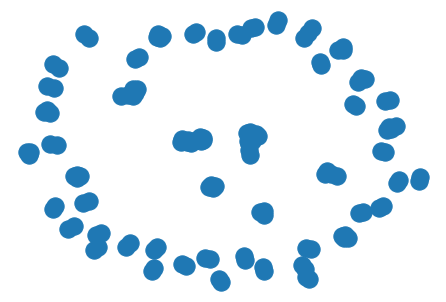

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(qda2.graph)

# Analyze Discursive simularity matrixs

1. [ ] read in the saved discursive community matrices for the GPT, Markovify, Human text, and merged_sample data
2. [ ] Anlayze that data to see if anything can be learned from looking at the data when compared to itself
3. [ ] Create one large discursive community matrix for the GPT, Markovify, and Human text data
  * [ ] If this fails, create three matrices, one for each of the GPT - Markovify, Markovify - Human, and Human - GPT text data 


In [2]:
# Read in the 
%cd '/content/drive/My Drive/Colab Notebooks/Thesis'

pd.read_pickle('merged_data_discursive_community.p')

df['num_legs'].sample(n=3, random_state=1)

/content/drive/My Drive/Colab Notebooks/Thesis


NameError: ignored

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



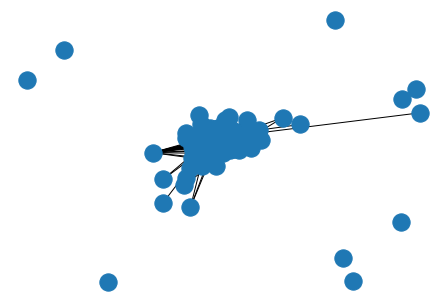

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(test1.G)


In [0]:
sputnik_discursive_community.A

array([[0.        , 0.2526012 , 0.38270919, ..., 0.        , 0.44103134,
        0.        ],
       [0.2526012 , 0.        , 0.07984948, ..., 0.25331401, 0.15324322,
        0.        ],
       [0.38270919, 0.07984948, 0.        , ..., 0.04359263, 0.23433881,
        0.        ],
       ...,
       [0.        , 0.25331401, 0.04359263, ..., 0.        , 0.        ,
        0.        ],
       [0.44103134, 0.15324322, 0.23433881, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
gpt_df['QDA_object'].to_list()

In [0]:
QDA.resonate(qda1, qda2)


0.12274007202687867

# NOTES SECTION AND IDEAS
This is just scratching the surface on the possiblities of data anaylsis in this way.  With additional time one could compare the Varience both the Markovify and GPT-2 models word frequency data vs the source data.  Even better we could use quantitative discursive analyses and centering resonance analysis theory to further explore the data.

## Create a pandas dataframe and perform basic analysis
Now we want to create a pandas dataframe and store all of our data analysis work to it

In [0]:
#print the basic stats of the Sputnik text data
print('----Sputnik text data----') 
print('Total words:   ', len(sputnik_text_data.split()))
print('Total stops:    ', sputnik_text_data.count('.'))
print('Mean sentance length:    ', len(sputnik_text_data.split())/sputnik_text_data.count('.'), "\n")

print('----Markovify text data----')
ttl_words = 0 #re-initialize variables to 0, this one is to count the total # of words in a text corpus
ttl_stops = 0 #re-initialize variables to 0, this one is to count the total # of words in a text corpus
markovify_alltext_string = ''
for n in markovify_text_data:
   markovify_alltext_string += n + " " # Build a single variable as one long text string
   ttl_words += len(n.split())
   ttl_stops += n.count('.')
print('Total words:   ', ttl_words)
print('Total stops:    ', ttl_stops)
print('Mean sentance length:    ', ttl_words/ttl_stops, "\n")

print('----GPT-2 finetuned text data----')
ttl_words = 0 #initialize variables to 0, this one is to count the total # of words in a text corpus
ttl_stops = 0 #initialize variables to 0, this one is to count the total # of words in a text corpus
gpt_alltext_string = ''
for n in gpt_text_data:
   gpt_alltext_string += n + " " # Build a single variable as one long text string
   ttl_words += len(n.split())
   ttl_stops += n.count('.')
print('Total words:   ', ttl_words)
print('Total stops:    ', ttl_stops)
print('Mean sentance length:    ', ttl_words/ttl_stops, "\n")



----Sputnik text data----
Total words:    1792275
Total stops:     79819
Mean sentance length:     22.454240218494345 

----Markovify text data----
Total words:    327500
Total stops:     13606
Mean sentance length:     24.07026311921211 

----GPT-2 finetuned text data----
Total words:    301760
Total stops:     13548
Mean sentance length:     22.27339828757012 



OK, the above analysis is neat, but that is circa 1990's formating.  Turn this thing into a dataframe and lets have some fun with pandas!
![Pandas love data science!](https://miro.medium.com/max/666/1*DadyHI0auADUxl5-ft4uSQ.jpeg)

In [0]:
d = {'Text_Data_str': [sputnik_text_data, markovify_alltext_string, gpt_alltext_string]} #create a dictinary with all the text data
df = pd.DataFrame(data=d, index=['Sputnik_News_Training_Dataset', 'Markovify_Model_Generated_Text', 'GPT_Model_Generated_Text'])
df['Sentance_count'] = df['Text_Data_str'].apply(lambda x : x.count('.')) #approximate sentance count
df['word_count'] = df['Text_Data_str'].apply(lambda x : len(x.split())) #approximate word count, not perfect due to special characters and emojis
df['Text_clean'] = df['Text_Data_str'].apply(lambda x : x.lower()) #make the text lowercase
df['Text_clean'] = df['Text_clean'].str.replace('[^\w\s]','') #clean the data to remove all special characters and punctuation
df['word_count_fixed'] = df['Text_clean'].apply(lambda x : len(x.split())) #more accurate word count after all special chars have been removed
df


,Text_Data_str,Sentance_count,word_count,Text_clean,word_count_fixed
Sputnik_News_Training_Dataset,Scientists at the National Research Nuclear Un...,79819,1792275,scientists at the national research nuclear un...,1777812
Markovify_Model_Generated_Text,Banking services across India and China. The f...,13606,327500,banking services across india and china the fi...,326274
GPT_Model_Generated_Text,"Rabat Kaur, a resident of the Indian city of H...",13548,301760,rabat kaur a resident of the indian city of hy...,299840


Remove the stop words from the text and then make some more graphs. 
* [ ] create calculate columns that are the difference between both the markovify and GPT-2 text compared to the source text 
to

In [0]:
non_stop_words = set(wordfreq_df.index.values) - set(stopwords.words('english')) #set of the words that aren't stop words in the dataset
wordfreq_ns_df = wordfreq_df.filter(non_stop_words, axis="index") #remove all the stopwords
wordfreq_ns_df.nlargest(30, 'Sputnik_word_freq', keep='all')
totals_row = wordfreq_ns_df.sum(numeric_only=True)
totals_row.name = 'SUM'
wordfreq_ns_df.append(totals_row)

,Sputnik_News_Training_Dataset,Markovify_Model_Generated_Text,GPT_Model_Generated_Text,Total,Sputnik_word_freq,Markovify_Model_word_freq,GPT_Model_word_freq
bonehoffman,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000
collapsible,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000
goldenpup,2.0,0.0,0.0,2.0,1.124978e-06,0.000000,0.000000
awestruck,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000
emphasised,76.0,15.0,5.0,96.0,4.274918e-05,0.000046,0.000017
...,...,...,...,...,...,...,...
thomasbrake,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000
chaosend,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000
stipulate,3.0,0.0,0.0,3.0,1.687468e-06,0.000000,0.000000
cannaregio,1.0,0.0,0.0,1.0,5.624892e-07,0.000000,0.000000


In [0]:


x_axis = wordfreq_ns_df.nlargest(90, 'Sputnik_word_freq', keep='all').index.tolist()
y_sputnik = wordfreq_ns_df.nlargest(90, 'Sputnik_word_freq', keep='all')['Sputnik_word_freq']
y_markovify = wordfreq_ns_df.nlargest(90, 'Sputnik_word_freq', keep='all')['Markovify_Model_word_freq']
y_gpt = wordfreq_ns_df.nlargest(90, 'Sputnik_word_freq', keep='all')['GPT_Model_word_freq']
fig = go.Figure(data=[
    go.Bar(name='Source Data', x=x_axis, y=y_sputnik),
    go.Bar(name='Markovify', x=x_axis, y=y_markovify),
    go.Bar(name='GPT-2', x=x_axis, y=y_gpt)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [0]:
print("example Markovify content:", markovify_text_data[70], "\n\n")
print("example GPT-2 content:", gpt_text_data[90])
print("example training content:", sputnik_text_data[sputnik_text_data.find("SOCHI (Sputnik) - Russia is a"):sputnik_text_data.find("SOCHI (Sputnik) - Russia is a")+1831])
n = markovify_alltext_string.find("Whatsapp")
print("\n\n\n\n :", markovify_alltext_string[(88985-300):(88985+300)])

Check to see what version of python and such is running, and then cite all those sources you used in your paper. 

In [1]:
from platform import python_version

print(python_version())
#Note to self: Write a module that returns all sources 

3.6.9


# License Information
MIT License

Copyright (c) 2020 Barney Ales

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.